# Get Most Frequent English Keywords

In [1]:
import pandas as pd
from keybert import KeyBERT
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Data Import

In [2]:
file_path = '../data/data.csv'
df = pd.read_csv(file_path, low_memory=False)

# Extract unique sentences from the 'english' column
sentences = df['phrase-gls-en'].dropna().unique()

## Get Keywords and Frequency

In [3]:
kw_model = KeyBERT()

In [4]:
# Extract one keyword per sentence
keyword_counter = Counter()
for sentence in sentences:
    keywords = kw_model.extract_keywords(sentence.strip(), keyphrase_ngram_range=(1, 1), stop_words='english', top_n=1)
    if keywords:
        keyword_counter[keywords[0][0]] += 1

## Generate Word Cloud
The word cloud is generated using the 30 most frequent keywords.

In [15]:
most_freq_keywords = dict(keyword_counter.most_common(54))

# Concatenate counts for 'ĝusso' and 'hrusso' since they are the same keyword
gusso_freq = most_freq_keywords['ĝusso']
most_freq_keywords['hrusso'] += gusso_freq

# Remove 'ĝusso' and 'filler' from the dictionary
del most_freq_keywords['ĝusso']
del most_freq_keywords['filler']

# Remove 'father' and 'vijay' from the dictionary since they refer to someone collecting
# the data and people were talking to him or about him
del most_freq_keywords['father']
del most_freq_keywords['vijay']

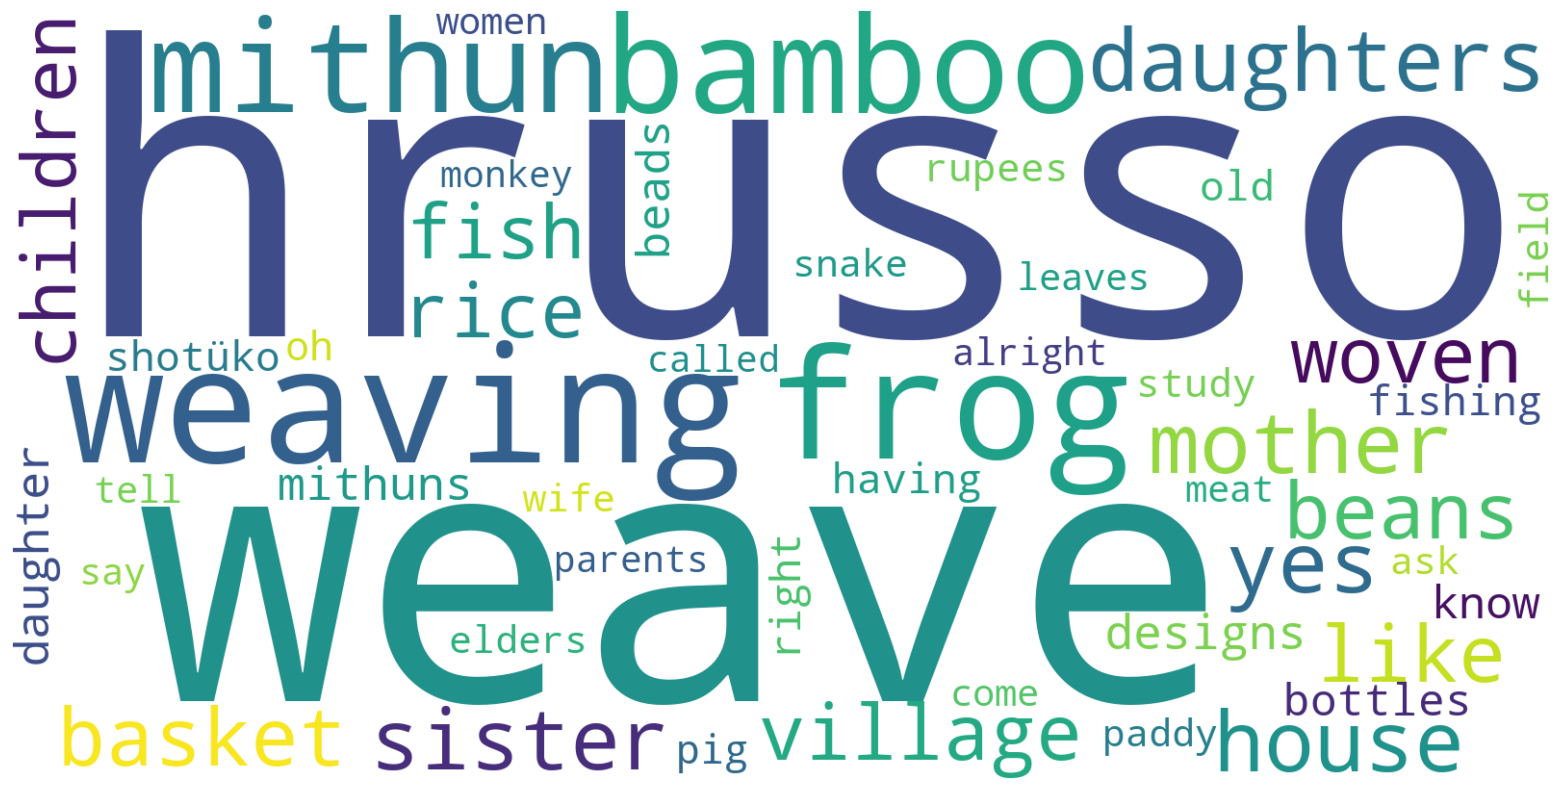

In [24]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(most_freq_keywords)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()